# IMPORTANT NOTE

This notebook was tested in 2018, but the package ``imexam`` did not work properly for many machines/environments for unknown reasons. Hence, I dropped this material from the official lecture schedule, but left it as archive. 

# 01. ``imexam`` with python

[``imexam`` (click to website)](https://imexam.readthedocs.io) is an [astropy-affiliated python package](https://www.astropy.org/affiliated/) to do a **quick-and-dirty** interactive photometry from given images. It is the python version of IRAF's ``imexamine``.

## 1. Install ``imexam``

### 1-1. Conda
```
conda install imexam -c astropy
```

### 1-2. git
If you want to install the bleeding-edge, clone ``https://github.com/spacetelescope/imexam`` and install using ``python setup.py install``.


## 2. Image Viewer

### 2-1. ``SAO ds9``
* [download link](http://ds9.si.edu/site/Download.html)
* If you use command line using terminal or Git Bash, you can do many things easily: [link](http://ds9.si.edu/doc/ref/command.html)
* Example: ``$ds9 -zscale ~/Downloads/observations/20180313SAAO*.fits -single &``.


#### * XPA METHOD of ds9
To use ``imexam`` correctly, you have to connect the ``ds9`` window with python. So

1. Open a FITS file with ``ds9``.
2. Go to File - XPA - Information
3. Copy the ``XPA_METHOD`` (see animation below)

![](figs/ds9_XPA.gif)

**DO NOT CLOSE THE ``ds9`` WINDOW!!!**

I will call this the **XPA METHOD** in the explanations below.

### 2-2 ``ginga``
``ginga`` is an [astropy-affiliated python package](https://www.astropy.org/affiliated/) to quickly look into image data.
* [official web](https://ginga.readthedocs.io/en/stable/)
* For ``ginga``, install using conda: ``conda install ginga -c conda-forge``,
* **or if you want to install the bleeding-edge**, clone ``https://github.com/ejeschke/ginga.git`` and install using ``python setup.py install``.

## 3. Importing and Setting Up

(You don't have to run the first code cell just below)

In [103]:
%load_ext version_information
import time
now = time.strftime("%Y-%m-%d %H:%M:%S (%Z = GMT%z)")
print(f"This notebook was generated at {now} ")

vv = %version_information imexam, ginga, version_information
for i, pkg in enumerate(vv.packages):
    print(f"{i} {pkg[0]:10s} {pkg[1]:s}")

This notebook was generated at 2019-04-28 18:46:14 (KST = GMT+0900) 
0 Python     3.6.8 64bit [GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
1 IPython    6.5.0
2 OS         Darwin 18.5.0 x86_64 i386 64bit
3 imexam     0.8.1
4 ginga      2.7.2
5 version_information 1.0.3


In [92]:
import imexam
from pathlib import Path
import warnings
warnings.filterwarnings('ignore', category=UserWarning, append=True)

DATAPATH = Path('..') / "data"
logger_path_ds9 = Path('.') / "tmp" / "logging_ds9.txt"
logger_path_ginga = Path('.') / "tmp" / "logging_ginga.txt"
logger_path_tutorial = Path('.') / "tmp" / "logging_tutorial.txt"

try:
    v.close()
except NameError:
    pass

for fpath in [logger_path_ds9, logger_path_ginga, logger_path_tutorial]:
    try:
        fpath.unlink()
    except FileNotFoundError:
        pass

## 4. Connect ``imexam`` with ``ds9``

### 4-1. Test on a Single Image

Connect your ``ds9`` window usint the XPA method you copied.

If you put your cursor to ``ds9`` window, it will blink (filled and open circle alternatively). 

Hit ``a`` key near any star for example, and you will see the following messages on terminal:

Saving imexam commands to 'tmp/logging_ds9.txt'

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /Users/ysbach/Dropbox/SNU_TA/AO2019/data/20180413SAAO_p4179_010449.fits
xc=606.708062	yc=395.602203
x              y              radius         flux           mag(zpt=25.00) sky/pix        fwhm(pix)
606.71         395.60         5              809.

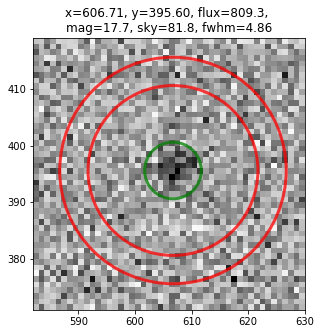

xc=398.643304	yc=428.005607
x              y              radius         flux           mag(zpt=25.00) sky/pix        fwhm(pix)
398.64         428.01         5              5857.03        15.58          82.23          4.57


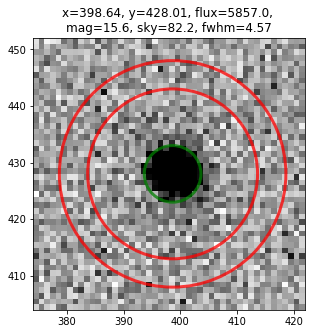

In [93]:
v = imexam.connect("7f000001:55756")  # Paste what you copied above
v.setlog(str(logger_path_ds9))
v.imexam()

As the information says, you can use other keys like ``j``, ``w``, etc. 

* **TIP**: All the output texts are saved to the log file, which I set as ``logging.txt``. It's contents are like this:

In [94]:
v.close()
with open(logger_path_ds9, 'r') as logf:
    print(logf.read())


gauss_center 
xc=606.708062	yc=395.602203

aper_phot 
x              y              radius         flux           mag(zpt=25.00) sky/pix        fwhm(pix)
606.71         395.60         5              809.27         17.73          81.79          4.86

gauss_center 
xc=398.643304	yc=428.005607

aper_phot 
x              y              radius         flux           mag(zpt=25.00) sky/pix        fwhm(pix)
398.64         428.01         5              5857.03        15.58          82.23          4.57



* **TIP**: I recommend to close the viewer by ``v.close()`` after usage; otherwise, errors may appear (not serious ones but annoying...).
* **TIP**: Note that the logging will be **appended** if the logger file already exists.
* **QUESTION**: What can you see if you do ``imexam.list_active_ds9()``?

### 4-2. Test on Multiple Images

Consider you want to do ``imexam`` to many images. 

* **QUESTION**: While not quitting by ``q`` key, open a new image with ``ds9`` by ``ctrl + O``. Then hit ``a`` key for example. You may see either error or cropped image different from the image you are seeing. Why is this so?
  * This is because, even though you loaded a new image, ``imexam`` still is looking at the original (old) image.
* **QUESTION**: How to avoid this?
  * Quit by ``q`` key to _disconnect_ from the old image, open new image, and then run ``v.imexam()`` again.

## 5. Connect ``imexam`` with ``ginga``

* Good things when you use ``ginga``: No need for XPA! A new web browser tab will be open for ``ginga``.

Run the code below and hit ``i`` key on the ``ginga`` tab to activate ``imexam interactive mode``. Then the shortcuts are identical to that of ``ds9``.

Saving imexam commands to 'tmp/logging_ginga.txt'


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


read: 2 at 487.8046875, 513.14453125
Plots now directed towards imexam2
read: 3 at 487.8046875, 513.14453125
read: a at 500.1666666666667, 499.8333333333333
xc=499.689383	yc=500.017265
x              y              radius         flux           mag(zpt=25.00) sky/pix        fwhm(pix)
499.69         500.02         5              442.29         18.39          82.22          4.19


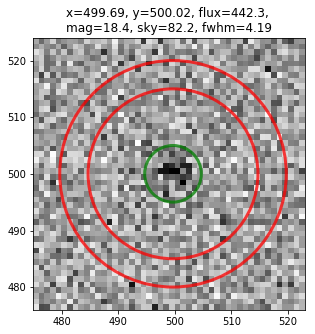

read: a at 398.5, 427.83333333333337
xc=398.643257	yc=428.005363
x              y              radius         flux           mag(zpt=25.00) sky/pix        fwhm(pix)
398.64         428.01         5              5857.04        15.58          82.23          4.58


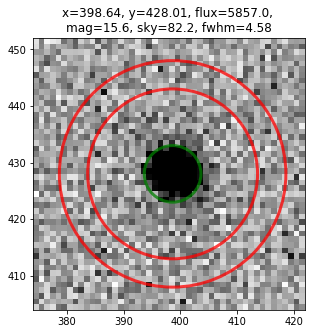

In [95]:
v = imexam.connect(viewer='ginga')  # Paste what you copied above
v.setlog(str(logger_path_ginga))
v.load_fits(str(DATAPATH / "20180413SAAO_p4179_010449.fits"))
v.scale()

In [100]:
v.close()
with open(logger_path_ds9, 'r') as logf:
    print(logf.read())


gauss_center 
xc=606.708062	yc=395.602203

aper_phot 
x              y              radius         flux           mag(zpt=25.00) sky/pix        fwhm(pix)
606.71         395.60         5              809.27         17.73          81.79          4.86

gauss_center 
xc=398.643304	yc=428.005607

aper_phot 
x              y              radius         flux           mag(zpt=25.00) sky/pix        fwhm(pix)
398.64         428.01         5              5857.03        15.58          82.23          4.57



(Read the notes for ``ds9``'s log file above.)

## 6. Tutorial
Now, similar to the examples given in the [official web](https://imexam.readthedocs.io/en/latest/imexam/examples.html#example-2), Let's do a quick-and-dirty aperture photometry.

Saving imexam commands to 'tmp/logging_tutorial.txt'

Press 'q' to quit

2	Make the next plot in a new window
a	Aperture sum, with radius region_size 
b	Return the 2D gauss fit center of the object
c	Return column plot
e	Return a contour plot in a region around the cursor
g	Return curve of growth plot
h	Return a histogram in the region around the cursor
j	1D [Gaussian1D default] line fit 
k	1D [Gaussian1D default] column fit
l	Return line plot
m	Square region stats, in [region_size],default is median
r	Return the radial profile plot
s	Save current figure to disk as [plot_name]
t	Make a fits image cutout using pointer location
w	Display a surface plot around the cursor location
x	Return x,y,value of pixel
y	Return x,y,value of pixel
Current image /Users/ysbach/Dropbox/SNU_TA/AO2019/data/20180413SAAO_p4179_010449.fits
xc=398.643257	yc=428.005363
x              y              radius         flux           mag(zpt=25.00) sky/pix        fwhm(pix)
398.64         428.01         5             

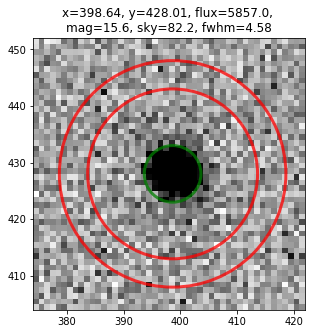

xc=398.643252	yc=428.005982
Background per pixel: 82.843251
Max. pix. flux =   232.724
amp =   217.843
fwhm =     4.471


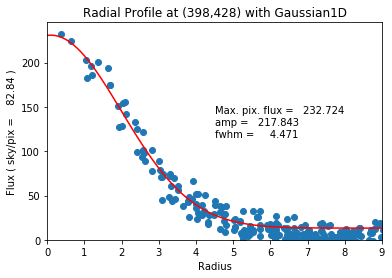

xc=398.643243	yc=428.005435

at (x,y)=398,428
radii:[1 2 3 4 5 6 7 8]
flux:[47.603243902651855, 1403.9049647463496, 3411.4160725652728, 4531.046662574266, 5019.239376985242, 6108.001868080915, 6053.805472226035, 6355.927128812687]


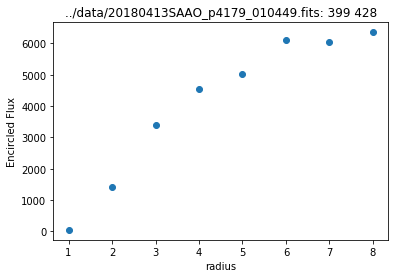

xc=499.689383	yc=500.017265
x              y              radius         flux           mag(zpt=25.00) sky/pix        fwhm(pix)
499.69         500.02         5              442.29         18.39          82.22          4.19


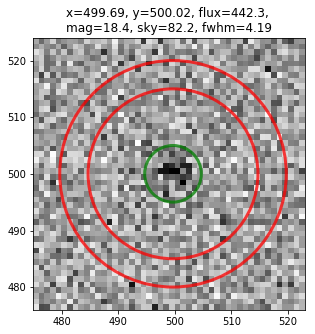

xc=499.685939	yc=500.016499
Background per pixel: 81.969500
Max. pix. flux =    57.054
amp =  5194.864
fwhm =     7.714


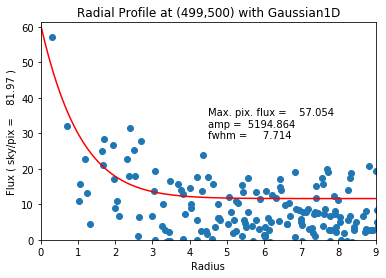

xc=499.689383	yc=500.017265

at (x,y)=499,500
radii:[1 2 3 4 5 6 7 8]
flux:[-141.81701608881042, -61.67966256080808, 106.75388034719072, 130.1604848886036, -169.12796264506596, 397.46531997274724, 47.76981958896431, 204.3722213842484]


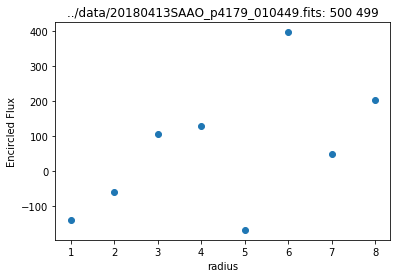

In [101]:
v = imexam.connect("7f000001:55756")  # Paste what you copied above
v.setlog(str(logger_path_tutorial))
v.load_fits(str(DATAPATH / "20180413SAAO_p4179_010449.fits"))
v.scale()
v.imexam()

In [102]:
v.close()
with open(logger_path_tutorial, 'r') as logf:
    print(logf.read())


gauss_center 
xc=398.643257	yc=428.005363

aper_phot 
x              y              radius         flux           mag(zpt=25.00) sky/pix        fwhm(pix)
398.64         428.01         5              5857.04        15.58          82.23          4.58

gauss_center 
xc=398.643252	yc=428.005982

radial_profile 
Background per pixel: 82.843251

radial_profile 
Max. pix. flux =   232.724
amp =   217.843
fwhm =     4.471

gauss_center 
xc=398.643243	yc=428.005435

curve_of_growth 

at (x,y)=398,428
radii:[1 2 3 4 5 6 7 8]
flux:[47.603243902651855, 1403.9049647463496, 3411.4160725652728, 4531.046662574266, 5019.239376985242, 6108.001868080915, 6053.805472226035, 6355.927128812687]

gauss_center 
xc=499.689383	yc=500.017265

aper_phot 
x              y              radius         flux           mag(zpt=25.00) sky/pix        fwhm(pix)
499.69         500.02         5              442.29         18.39          82.22          4.19

gauss_center 
xc=499.685939	yc=500.016499

radial_profile 
Backgro

### Question
Now, consider the first target is one of the stars with known V-band magnitude, $V_0$. What is the magnitude of the second object?

### Answer
#### Method 1
Pogson's formula says $ m_1 - m_2 = -2.5 \log_{10} \frac{I_1}{I_2}$. In this example, $m_1 = V_0$ is the known magnitude of the star, $I_1$ and $I_2$ are the pixel counts of the stars, 5857.03 and 442.40. Then $ m_2 = V_0 + 2.8 $. 

#### Method 2
The instrumental magnitudes are given as $m_1' = 15.58$ and $m_2' = 18.39$, so the magnitude differ by 2.8 magnitude. Thus, $m_2 = V_0 + 2.8$.

### Discussion
From the growth curve, you can see the second object is very unstable (i.e., low S/N ratio). Therefore, we either have to stack images to improve the S/N ratio, or fix the aperture size based on the seeing disc size. Here I just simply took 5 pixel radius.